# Embeddings

### train_dsl (Confidential)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 100 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("train_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("train.npy", embeddings)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/500
1000/1000 [==============================] - 16s 16ms/sample - loss: 33396.2131
Epoch 2/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 22467.2020
Epoch 3/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 19156.3998
Epoch 4/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 18398.9463
Epoch 5/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 17678.8219
Epoch 6/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 16512.1630
Epoch 7/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 14640.1267
Epoch 8/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12152.5055
Epoch 9/500
1000/1000 [=============================

1000/1000 [==============================] - 14s 14ms/sample - loss: 6801.4804
Epoch 83/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6797.8857
Epoch 84/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6794.9227
Epoch 85/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6790.6264
Epoch 86/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6787.3292
Epoch 87/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6783.8636
Epoch 88/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6781.5834
Epoch 89/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6785.1226
Epoch 90/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6785.5345
Epoch 91/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6782.7843
Epoch 92/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6782.3923
E

1000/1000 [==============================] - 15s 15ms/sample - loss: 6642.5418
Epoch 171/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6646.3584
Epoch 172/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6647.2077
Epoch 173/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6642.2836
Epoch 174/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6640.7957
Epoch 175/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6639.9986
Epoch 176/500
1000/1000 [==============================] - 15s 15ms/sample - loss: 6637.2854
Epoch 177/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6633.6243
Epoch 178/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6633.5147
Epoch 179/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6632.6550
Epoch 180/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 14s 14ms/sample - loss: 6587.3493
Epoch 259/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6584.3548
Epoch 260/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6582.1037
Epoch 261/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6580.4160
Epoch 262/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6579.8591
Epoch 263/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6580.0603
Epoch 264/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6578.6704
Epoch 265/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6580.0159
Epoch 266/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6579.3405
Epoch 267/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6581.3415
Epoch 268/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 13s 13ms/sample - loss: 6564.3331
Epoch 347/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6562.5999
Epoch 348/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6563.4807
Epoch 349/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6561.6571
Epoch 350/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6557.6896
Epoch 351/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6552.6606
Epoch 352/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6552.1705
Epoch 353/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6552.7436
Epoch 354/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6553.0486
Epoch 355/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6552.1722
Epoch 356/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 13s 13ms/sample - loss: 6532.6256
Epoch 435/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6533.5565
Epoch 436/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6534.7763
Epoch 437/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6534.7671
Epoch 438/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6535.4894
Epoch 439/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6537.3629
Epoch 440/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6536.7756
Epoch 441/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6536.6139
Epoch 442/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6535.3486
Epoch 443/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6534.7877
Epoch 444/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6

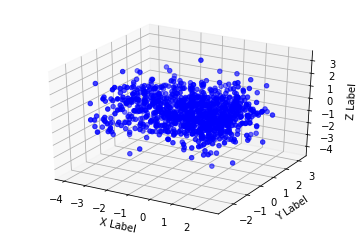

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("train.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()



### val_dsl

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 100 #32
EPOCHS = 500

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("val_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("val.npy", embeddings)

Epoch 1/500
1000/1000 [==============================] - 15s 15ms/sample - loss: 31945.2377
Epoch 2/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 20801.0922
Epoch 3/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 18958.9787
Epoch 4/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 18393.2469
Epoch 5/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 17959.2961
Epoch 6/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 17329.8670
Epoch 7/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 16456.6777
Epoch 8/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 15134.6204
Epoch 9/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 13369.6795
Epoch 10/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 12117.8824
Epoch 11/500
1000/1000 [==============================] - 13s 13ms/sample - los

1000/1000 [==============================] - 14s 14ms/sample - loss: 6972.9932
Epoch 91/500
1000/1000 [==============================] - 15s 15ms/sample - loss: 6970.9001
Epoch 92/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6968.9151
Epoch 93/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6965.9829
Epoch 94/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6964.0333
Epoch 95/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6960.8508
Epoch 96/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6955.0735
Epoch 97/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6960.7089
Epoch 98/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6953.3307
Epoch 99/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6947.6390
Epoch 100/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6939.9397


1000/1000 [==============================] - 14s 14ms/sample - loss: 6800.2077
Epoch 179/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6800.5599
Epoch 180/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6799.7268
Epoch 181/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6797.6815
Epoch 182/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6795.9436
Epoch 183/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6794.1997
Epoch 184/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6792.9344
Epoch 185/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6797.9096
Epoch 186/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6792.7428
Epoch 187/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6790.7720
Epoch 188/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 14s 14ms/sample - loss: 6736.9821
Epoch 267/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6739.9217
Epoch 268/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6745.1716
Epoch 269/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6739.5819
Epoch 270/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6736.4207
Epoch 271/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6732.5488
Epoch 272/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6730.7093
Epoch 273/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6729.9043
Epoch 274/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6737.9966
Epoch 275/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6739.0606
Epoch 276/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 14s 14ms/sample - loss: 6692.4126
Epoch 355/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6691.1295
Epoch 356/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6691.8901
Epoch 357/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6689.5326
Epoch 358/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6690.6727
Epoch 359/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6690.4089
Epoch 360/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6687.0064
Epoch 361/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6685.4704
Epoch 362/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6686.1659
Epoch 363/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6683.7491
Epoch 364/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6

1000/1000 [==============================] - 14s 14ms/sample - loss: 6662.4702
Epoch 443/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6660.8272
Epoch 444/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6659.0330
Epoch 445/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6658.8926
Epoch 446/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6657.5836
Epoch 447/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6656.3626
Epoch 448/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6655.6388
Epoch 449/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6655.5911
Epoch 450/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6657.2889
Epoch 451/500
1000/1000 [==============================] - 14s 14ms/sample - loss: 6662.4270
Epoch 452/500
1000/1000 [==============================] - 13s 13ms/sample - loss: 6

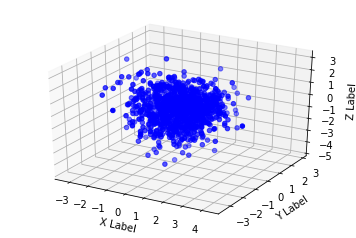

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("val.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


### uniform_dsl (Syn)

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

# Define constants
IMAGE_SIZE = (128, 128)
LATENT_DIM = 32 #100
BATCH_SIZE = 100 #32
EPOCHS = 50

# Function to load and preprocess images
def load_and_preprocess_images(image_folder):
    image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder)]
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess images
train_images = load_and_preprocess_images("uniform_dsl")

# Define the encoder part of VAE
encoder_inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
z_mean = layers.Dense(LATENT_DIM)(x)
z_log_var = layers.Dense(LATENT_DIM)(x)

# Define sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], LATENT_DIM), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Define the decoder part of VAE
decoder_inputs = layers.Input(shape=(LATENT_DIM,))
x = layers.Dense(32*32*64, activation='relu')(decoder_inputs)
x = layers.Reshape((32, 32, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)

# Define the VAE model
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

outputs = decoder(encoder(encoder_inputs)[2])
vae = models.Model(encoder_inputs, outputs, name='vae')

# Define the loss function for VAE
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
    reconstruction_loss *= IMAGE_SIZE[0] * IMAGE_SIZE[1] * 3
    kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
    kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss

# Compile the VAE model
vae.compile(optimizer='adam', loss=lambda x, y: vae_loss(encoder_inputs, outputs, z_mean, z_log_var))

# Train the VAE model
vae.fit(train_images, train_images, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Extract embeddings from the encoder part
embeddings = encoder.predict(train_images)[0]  # Assuming you want z_mean

# Save or use embeddings as needed
np.save("uniform.npy", embeddings)


Epoch 1/50
1000/1000 [==============================] - 16s 16ms/sample - loss: 32533.2176
Epoch 2/50
1000/1000 [==============================] - 14s 14ms/sample - loss: 21323.8143
Epoch 3/50
1000/1000 [==============================] - 14s 14ms/sample - loss: 18951.1063
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/sample - loss: 18573.1633
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18388.8684
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18282.5324
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18209.9029
Epoch 8/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18150.5023
Epoch 9/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18103.0566
Epoch 10/50
1000/1000 [==============================] - 14s 14ms/sample - loss: 18069.4980
Epoch 11/50
1000/1000 [==============================] - 13s 13ms/sample - loss: 18048.09

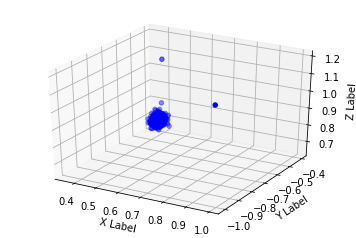

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the embeddings from the .npy file
embeddings = np.load("uniform.npy")

# Assuming the embeddings are 3-dimensional
x = embeddings[:, 0]
y = embeddings[:, 1]
z = embeddings[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

<IPython.core.display.Javascript object>


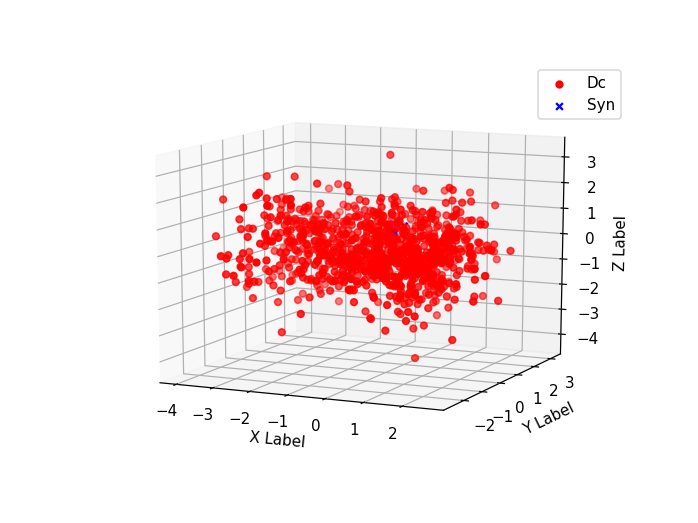

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Load the embeddings from the first .npy file
embeddings1 = np.load("train.npy")


# Load the embeddings from the second .npy file
embeddings2 = np.load("uniform.npy")

# Assuming the embeddings are 3-dimensional
x1, y1, z1 = embeddings1[:, 0], embeddings1[:, 1], embeddings1[:, 2]
x2, y2, z2 = embeddings2[:, 0], embeddings2[:, 1], embeddings2[:, 2]

# Plot the embeddings in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='r', marker='o', label='Dc')
ax.scatter(x2, y2, z2, c='b', marker='x', label='Syn')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


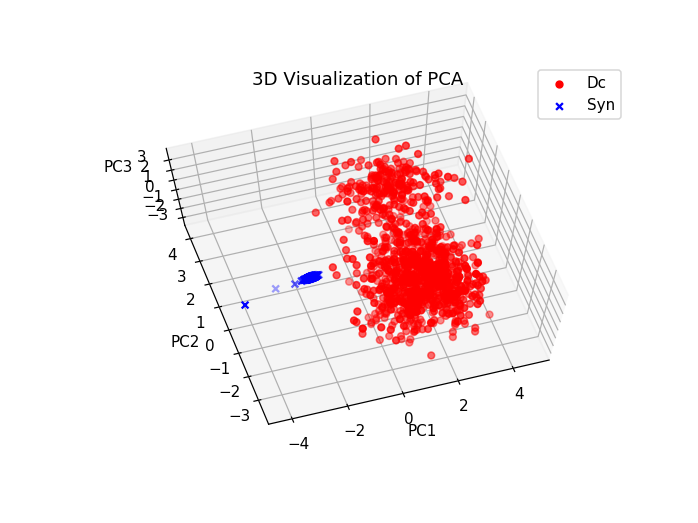

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
# %matplotlib notebook

# Generate synthetic data for two datasets
dataset1 = np.load("train.npy")  # Replace this with your dataset
dataset2 = np.load("uniform.npy")  # Replace this with your dataset

# Concatenate the two datasets
combined_dataset = np.concatenate((dataset1, dataset2), axis=0)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(combined_dataset)

# Split the PCA result back into the two datasets
pca_dataset1 = pca_result[:1000, :]
pca_dataset2 = pca_result[1000:, :]

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first dataset
ax.scatter(pca_dataset1[:, 0], pca_dataset1[:, 1], pca_dataset1[:, 2], c='r', marker='o', label='Dc')

# Plot the second dataset
ax.scatter(pca_dataset2[:, 0], pca_dataset2[:, 1], pca_dataset2[:, 2], c='b', marker='x', label='Syn')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Visualization of PCA')

plt.legend()